In [8]:
import matplotlib.pyplot as plt
# Plot probability distriubution
def plot_prob_dist(probs):
    """Plot the probability distribution of a list of probabilities"""
    plt.figure(figsize=(12, 6))
    plt.hist(probs, bins=100)
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.title('Probability Distribution')
    plt.show()

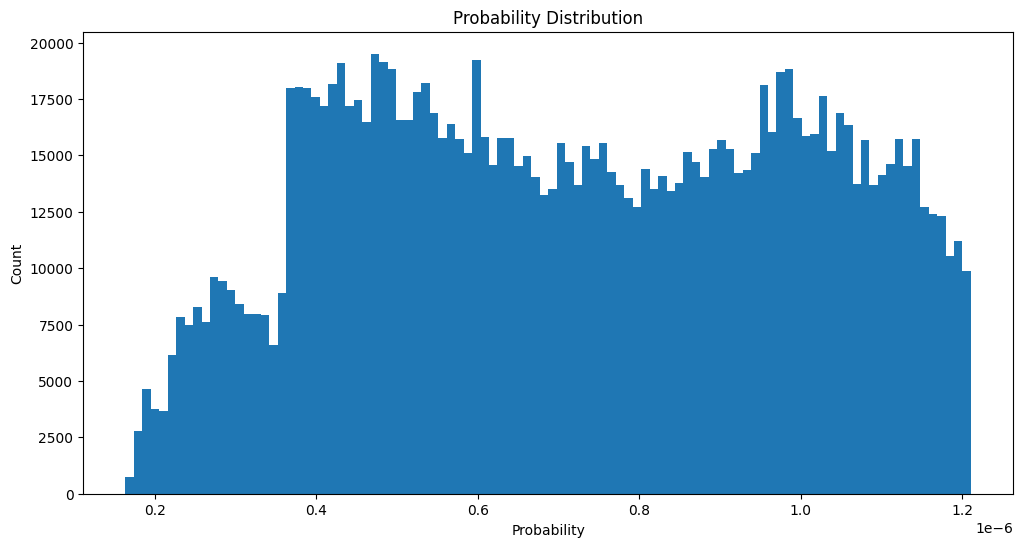

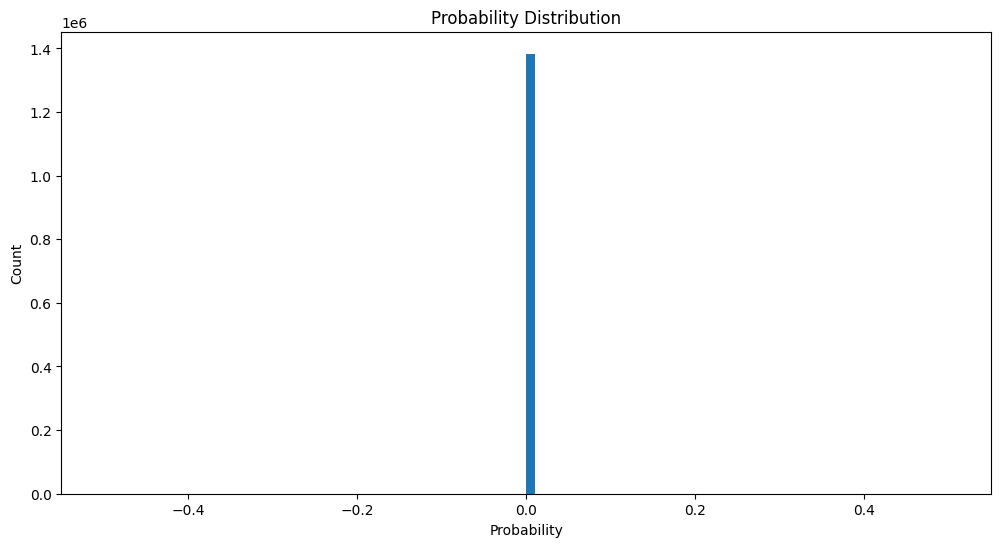

In [17]:
import pickle
import numpy as np
weights = pickle.load(open('/home/kydliceh/.cache/server/ufal/robeczech-base/512/start/train/weights-2.0.pkl', 'rb'))
plot_prob_dist(weights)
non_sampled_weights = 1 / len(weights) * np.ones(len(weights))
plot_prob_dist(non_sampled_weights)

In [101]:
predictions = pickle.load(open("../../predictions/test_human/category_predictions.pkl", "rb"))

In [106]:
len(preds), len(true)

(100, 100)

In [134]:
import torch
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

def get_data(task, split):
    predictions = pickle.load(open(f"../predictions/{split}/{task}_predictions.pkl", "rb"))
    preds = torch.argmax(torch.cat(predictions), dim=1)
    preds = preds.numpy().tolist()
    true = load_dataset("hynky/czech_news_dataset", split=split)
    features = true.features[task].names[1:]
    true = [x -1 for x in true[task] if x != 0]
    unique_true = np.unique(true + preds)
    features = [features[i] for i in unique_true]
    print(f"Unique true: {unique_true}")
    return true, preds, features


def get_classification_report(task, split):
    true, preds, features = get_data(task, split)
    report = classification_report(true, preds, target_names=features, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop("weighted avg")
    report_df = report_df.drop("accuracy")
    report_df = report_df.drop("support", axis=1)
    report_df.columns = [x.capitalize() for x in report_df.columns]
    report_df = report_df.rename(columns={"F1-score": "F1"})

    # support is column drop it
    report_df = report_df.rename(index={"macro avg": "Macro Avg"})


def get_confusion_matrix(ax, task, split, normalize=None):
    true, preds, features = get_data(task, split)
    cm = confusion_matrix(true, preds, normalize=normalize)
    # move cbar to the bottom
    # use percentage instead of float
    sns.heatmap(cm, annot=True, xticklabels=features, yticklabels=features, cmap="Blues", square=True, cbar=False, ax=ax, fmt=".2f")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

    # set ylabels to be rotated by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # the xlabels overlap with each other if the text is too long resolve it











In [132]:
# get matplotlib styles that can be used
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Found cached dataset parquet (/home/kydliceh/.cache/huggingface/datasets/hynky___parquet/hynky--czech_news_dataset-db0c35709cd8d145/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertin

Unique true: [0 1 2 3 4 5 6]


findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertinus Sans' not found.
findfont: Font family 'Libertin

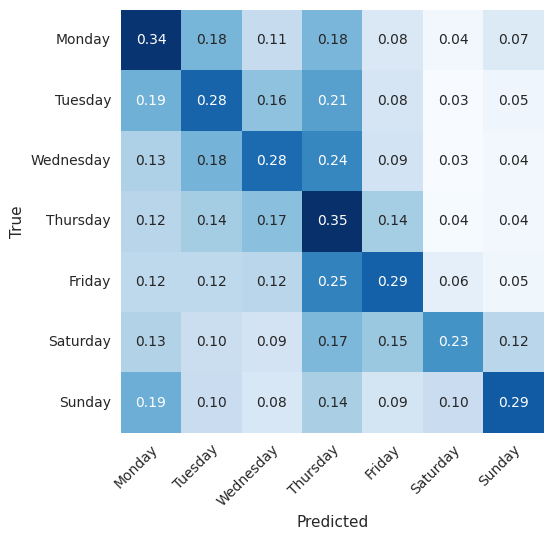

In [151]:
import pickle
import numpy as np
reports = []
# for task in ["server", "category", "authors_cum_gender", "day_of_week"]:
for task in ["day_of_week"]:
    for split in ["test"]:
        # use good style for confusion matrix
        with plt.style.context(["seaborn-white", "seaborn-notebook"]):
            #set font to libertinus
            plt.rcParams["font.family"] = "Libertinus Sans"



            fig_size = None
            if task == "category":
                fig_size = (12,12)

            fig, ax = plt.subplots(1, 1, figsize=fig_size)
            # report = get_classification_report(task, split)
            # report_df = report_df.applymap(lambda x: "{:.2f}".format(x * 100) if isinstance(x, float) else x)
            # reports.append(report_df.to_latex(caption="Classification report for task {} on split {}.".format(task, split)))
            get_confusion_matrix(ax, task, split, normalize="true")
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")
            fig.tight_layout()
            fig.show()
            fig.savefig(f"{task}_{split}_confusion_matrix.pdf", bbox_inches="tight")


for report in reports:
    print(report)





